In [25]:
import bigbang.ietfattendance as ia
import pandas as pd
import matplotlib.pyplot as plt

import Levenshtein

Start by getting the attendence information for IETF.

In [2]:
alld = ia.all_attendance()

What organizations are best represented?

In [16]:
alld.groupby('Organization').count()['mn'].sort_values(ascending=False)[:20]

Organization
                       4883
Cisco                   553
Cisco Systems           544
Huawei                  518
Ericsson                466
Google                  403
Juniper Networks        336
Nokia                   327
Internet Society        304
Huawei Technologies     199
Microsoft               197
ICANN                   190
NIST                    145
ETRI                    145
Mozilla                 143
RIPE NCC                124
Deutsche Telekom        114
Oracle                  112
Akamai Technologies     110
Facebook                107
Name: mn, dtype: int64

Even in this short list, there are repeat names. We need to apply entity resolution.

In [17]:
alld['Organization'].dropna().unique().shape

(5331,)

This is too many names! It will overwhelm the entity resolver. Let's use a subset of the most relevant entities.

In [32]:
N = 100
topN = alld.groupby('Organization').count()['mn'].sort_values(ascending=False)[:N].index

distance_matrix = process.matricize(topN,
                  Levenshtein.distance)

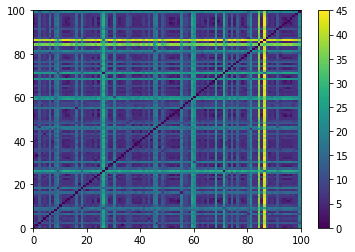

In [34]:
plt.pcolor(distance_matrix)
plt.colorbar()